# Task 3 Feature Engineering 

Sub-task 1: Think through what key drivers of churn could be for our client

Sub-task 2: Build the features in order to get ready to model

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import pandas as pd
import seaborn as sns
import datetime
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(color_codes=True)
pd.set_option('display.max_columns',50)

## Load data 

In [3]:
date_cols=['date_activ','date_end','date_modif_prod','date_renewal']
train = pd.read_csv('train_clean.csv',parse_dates=date_cols)
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [4]:
history = pd.read_csv('history_clean.csv',parse_dates=['price_date'])
history.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Feature engineering 

First we need to do the Feature Selection 
We will create the average consumption of the year as one new feature 

In [5]:
mean_year=history.groupby(['id']).mean().reset_index()

In [6]:
mean_6m=history[history['price_date']>'2015-06-01'].groupby(['id']).mean().reset_index()

In [7]:
mean_3m=history[history['price_date']>'2015-10-01'].groupby(['id']).mean().reset_index()

In [8]:
#Combine the mean year in a single dataframe
mean_year=mean_year.rename(index=str,columns={'price_p1_var':'mean_year_price_p1_var',
                                              'price_p2_var':'mean_year_price_p2_var',
                                              'price_p3_var':'mean_year_price_p3_var',
                                              'price_p1_fix':'mean_year_price_p1_fix',
                                              'price_p2_fix':'mean_year_price_p2_fix',
                                              'price_p3_fix':'mean_year_price_p3_fix',})
mean_year['mean_year_price_p1']=mean_year['mean_year_price_p1_var']+mean_year['mean_year_price_p1_fix']
mean_year['mean_year_price_p2']=mean_year['mean_year_price_p2_var']+mean_year['mean_year_price_p2_fix']
mean_year['mean_year_price_p3']=mean_year['mean_year_price_p3_var']+mean_year['mean_year_price_p3_fix']

In [9]:
mean_6m=mean_6m.rename(index=str,columns={'price_p1_var':'mean_6m_price_p1_var',
                                              'price_p2_var':'mean_6m_price_p2_var',
                                              'price_p3_var':'mean_6m_price_p3_var',
                                              'price_p1_fix':'mean_6m_price_p1_fix',
                                              'price_p2_fix':'mean_6m_price_p2_fix',
                                              'price_p3_fix':'mean_6m_price_p3_fix',})
mean_6m['mean_6m_price_p1']=mean_6m['mean_6m_price_p1_var']+mean_6m['mean_6m_price_p1_fix']
mean_6m['mean_6m_price_p2']=mean_6m['mean_6m_price_p2_var']+mean_6m['mean_6m_price_p2_fix']
mean_6m['mean_6m_price_p3']=mean_6m['mean_6m_price_p3_var']+mean_6m['mean_6m_price_p3_fix']

In [10]:
mean_3m=mean_3m.rename(index=str,columns={'price_p1_var':'mean_3m_price_p1_var',
                                              'price_p2_var':'mean_3m_price_p2_var',
                                              'price_p3_var':'mean_3m_price_p3_var',
                                              'price_p1_fix':'mean_3m_price_p1_fix',
                                              'price_p2_fix':'mean_3m_price_p2_fix',
                                              'price_p3_fix':'mean_3m_price_p3_fix',})
mean_3m['mean_3m_price_p1']=mean_3m['mean_3m_price_p1_var']+mean_3m['mean_3m_price_p1_fix']
mean_3m['mean_3m_price_p2']=mean_3m['mean_3m_price_p2_var']+mean_3m['mean_3m_price_p2_fix']
mean_3m['mean_3m_price_p3']=mean_3m['mean_3m_price_p3_var']+mean_3m['mean_3m_price_p3_fix']

In [11]:
history_new = pd.merge(mean_year,mean_6m, on='id',how='left')
history_new = pd.merge(mean_year,mean_3m, on='id',how='left')
history_new.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


### Datetime

In [12]:
#Extract contract duration 
#we will define the duration=date_end-date_activ

train['contract_duration']=((train['date_end']-train['date_activ'])/ np.timedelta64(1,'M')).astype(int)
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,47
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,36
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,84
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,72
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,72


In [13]:
#set the reference time to be 2016-01-01
#write a finction to caculate the month difference between datetime features
def calculatemonth(referencetime,dataframe,column):
    time_diff=referencetime-dataframe[column]
    months=(time_diff/np.timedelta64(1,'M')).astype(int)
    return months

In [14]:
referencetime=pd.to_datetime('2016-01-01')

In [15]:
train['activ_diff']=calculatemonth(referencetime,train,'date_activ')
train['end_diff']=calculatemonth(referencetime,train,'date_end')
train['modif_diff']=calculatemonth(referencetime,train,'date_modif_prod')
train['renewal_diff']=calculatemonth(referencetime,train,'date_renewal')
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,47,37,-10,37,1
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,36,30,-5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,84,76,-7,76,4
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,72,68,-3,68,8
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,72,69,-2,69,9


In [16]:
#Remove the date columns 
train.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'],inplace=True)

In [17]:
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,47,37,-10,37,1
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,36,30,-5,2,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,84,76,-7,76,4
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,72,68,-3,68,8
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,72,69,-2,69,9


## Categorical Data 

### Binary encoding 


In [18]:
#For the column has_gas,replace t for 1 and f for 0
train['has_gas']=train['has_gas'].replace(['t','f'],[1,0])

### one-hot encoding 

In [19]:
#for the column channel_sales, first fill the null value 
train['channel_sales']=train['channel_sales'].fillna('null_values_channel')

In [20]:
train['channel_sales']=train['channel_sales'].apply(lambda x:x[:4])
categories_channel= pd.get_dummies(train[['channel_sales']])
train= pd.concat([train, categories_channel], axis =1)
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_null,channel_sales_sddi,channel_sales_usil
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmke,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foos,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,null,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,84,76,-7,76,4,0,0,0,0,0,1,0,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foos,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmke,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,0


In [21]:
#for the column origin_up, first fill the null value 
train['origin_up']=train['origin_up'].fillna('null_values_origin')

In [22]:
train['origin_up']=train['origin_up'].apply(lambda x:x[:4])
categories_origin= pd.get_dummies(train[['origin_up']])
train= pd.concat([train, categories_origin], axis =1)
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_null,channel_sales_sddi,channel_sales_usil,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_null,origin_up_usap
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmke,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,ldks,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foos,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxid,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,null,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,kamk,13.800,0,84,76,-7,76,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foos,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,kamk,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmke,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,kamk,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [23]:
#for the column activity_new,first fill the null value
train['activity_new']=train['activity_new'].fillna('null_values_activity')

In [24]:
train['activity_new']=train['activity_new'].apply(lambda x:x[:4])
categories_activity= pd.get_dummies(train[['activity_new']])
train= pd.concat([train, categories_activity], axis =1)
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_duration,activ_diff,...,activity_new_xcso,activity_new_xcsw,activity_new_xcxk,activity_new_xfef,activity_new_xffa,activity_new_xkab,activity_new_xkfp,activity_new_xkxo,activity_new_xlpl,activity_new_xlpu,activity_new_xlwl,activity_new_xmdo,activity_new_xmwb,activity_new_xpma,activity_new_xpow,activity_new_xpwo,activity_new_xpxa,activity_new_xscb,activity_new_xueb,activity_new_xufx,activity_new_xumu,activity_new_xwka,activity_new_xwki,activity_new_xwpm,activity_new_xwws
0,48ada52261e7cf58715202705a0451c9,esoi,lmke,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,ldks,180.000,0,47,37,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,null,foos,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxid,43.648,1,36,30,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,null,null,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,kamk,13.800,0,84,76,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,null,foos,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,kamk,13.856,0,72,68,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,null,lmke,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,kamk,13.200,0,72,69,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
train=train.drop(['channel_sales','origin_up','activity_new'],axis=1)
train.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,...,activity_new_xcso,activity_new_xcsw,activity_new_xcxk,activity_new_xfef,activity_new_xffa,activity_new_xkab,activity_new_xkfp,activity_new_xkxo,activity_new_xlpl,activity_new_xlpu,activity_new_xlwl,activity_new_xmdo,activity_new_xmwb,activity_new_xpma,activity_new_xpow,activity_new_xpwo,activity_new_xpxa,activity_new_xscb,activity_new_xueb,activity_new_xufx,activity_new_xumu,activity_new_xwka,activity_new_xwki,activity_new_xwpm,activity_new_xwws
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,180.000,0,47,37,-10,37,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,43.648,1,36,30,-5,2,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,13.800,0,84,76,-7,76,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,13.856,0,72,68,-3,68,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,13.200,0,72,69,-2,69,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Numerical Data 

### Distribution transformation

From the previous EDA we can see that some features are highly skewed, we need to transform the distribution to normal-like distribution

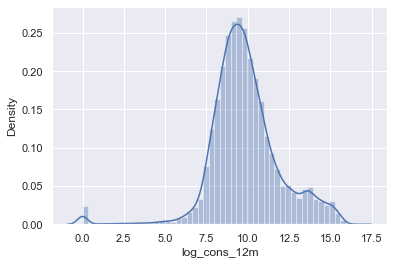

In [26]:
#First for the cons_12, remove the negative values and apply a log tranformation
train.loc[train.cons_12m<0,'cons_12m']=np.nan
train['cons_12m']=train['cons_12m'].dropna()
train['log_cons_12m']=train['cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_cons_12m']);

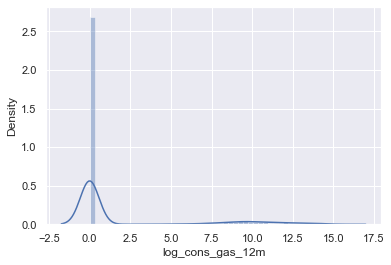

In [27]:
train.loc[train.cons_gas_12m<0,'cons_gas_12m']=np.nan
train['cons_gas_12m']=train['cons_gas_12m'].dropna()
train['log_cons_gas_12m']=train['cons_gas_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_cons_gas_12m']);

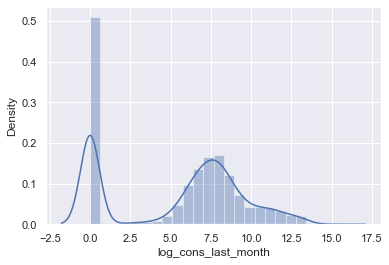

In [28]:
train.loc[train.cons_last_month<0,'cons_last_month']=np.nan
train['cons_last_month']=train['cons_last_month'].dropna()
train['log_cons_last_month']=train['cons_last_month'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_cons_last_month']);

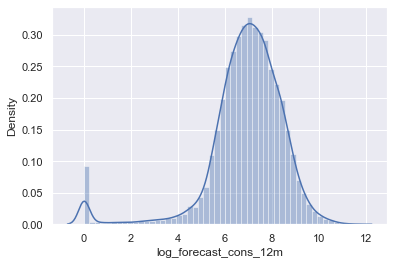

In [29]:
train.loc[train.forecast_cons_12m<0,'forecast_cons_12m']=np.nan
train['forecast_cons_12m']=train['forecast_cons_12m'].dropna()
train['log_forecast_cons_12m']=train['forecast_cons_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_forecast_cons_12m']);

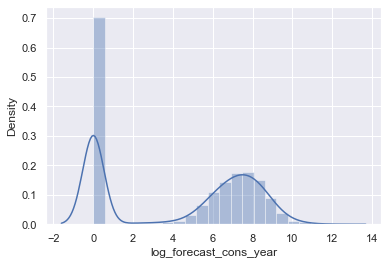

In [30]:
train.loc[train.forecast_cons_year<0,'forecast_cons_year']=np.nan
train['forecast_cons_year']=train['forecast_cons_year'].dropna()
train['log_forecast_cons_year']=train['forecast_cons_year'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_forecast_cons_year']);

<AxesSubplot:xlabel='log_forecast_meter_rent_12m', ylabel='Density'>

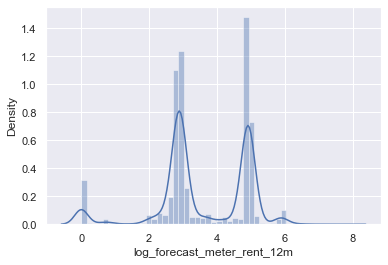

In [31]:
train.loc[train.forecast_meter_rent_12m<0,'forecast_meter_rent_12m']=np.nan
train['forecast_meter_rent_12m']=train['forecast_meter_rent_12m'].dropna()
train['log_forecast_meter_rent_12m']=train['forecast_meter_rent_12m'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_forecast_meter_rent_12m'])

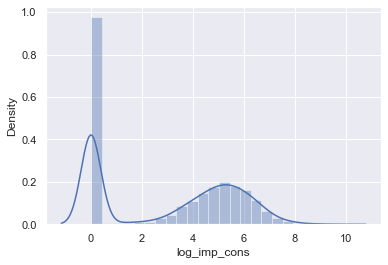

In [32]:
train.loc[train.imp_cons<0,'imp_cons']=np.nan
train['imp_cons']=train['imp_cons'].dropna()
train['log_imp_cons']=train['imp_cons'].apply(lambda x:np.log(1+x))
sns.distplot(train['log_imp_cons']);

In [33]:
train=train.drop(['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','imp_cons'],axis=1)
train.head()

,id,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_null,channel_sales_sddi,...,activity_new_xkxo,activity_new_xlpl,activity_new_xlpu,activity_new_xlwl,activity_new_xmdo,activity_new_xmwb,activity_new_xpma,activity_new_xpow,activity_new_xpwo,activity_new_xpxa,activity_new_xscb,activity_new_xueb,activity_new_xufx,activity_new_xumu,activity_new_xwka,activity_new_xwki,activity_new_xwpm,activity_new_xwws,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons
0,48ada52261e7cf58715202705a0451c9,0.0,0.095919,0.088347,58.995952,0,-41.76,-41.76,1,1732.36,3,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.641989,0.000000,9.212937,10.185703,9.212937,5.886909,6.724794
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,3,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,10.914124,0.000000,0.000000,0.000000,1.022451,0.000000
2,d29c2c54acc38ff3c0614d0a653813dd,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,84,76,-7,76,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.446985,0.000000,0.000000,5.252012,0.000000,2.848971,0.000000
3,764c75f661154dac3a6c254cd082ea7d,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.300786,0.000000,0.000000,3.891004,0.000000,3.681855,0.000000
4,bba03439a292a1e166f80264c16191cb,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.368340,0.000000,0.000000,5.484963,0.000000,3.036394,0.000000


## Merge Data Together 

In [34]:
correlation=train.corr()

In [35]:
df = pd.merge(train, history_new, on='id', how = 'left')
df.head()

,id,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_null,channel_sales_sddi,...,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,48ada52261e7cf58715202705a0451c9,0.0,0.095919,0.088347,58.995952,0,-41.76,-41.76,1,1732.36,3,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,...,12.641989,0.000000,9.212937,10.185703,9.212937,5.886909,6.724794,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.099169,0.089992,0.066557,59.055124,36.417705,8.350997,59.154293,36.507697,8.417554
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,3,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,...,0.000000,10.914124,0.000000,0.000000,0.000000,1.022451,0.000000,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.131756,0.092639,0.036910,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
2,d29c2c54acc38ff3c0614d0a653813dd,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,84,76,-7,76,4,0,0,0,0,0,1,0,...,8.446985,0.000000,0.000000,5.252012,0.000000,2.848971,0.000000,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000
3,764c75f661154dac3a6c254cd082ea7d,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,...,6.300786,0.000000,0.000000,3.891004,0.000000,3.681855,0.000000,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000
4,bba03439a292a1e166f80264c16191cb,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,...,7.368340,0.000000,0.000000,5.484963,0.000000,3.036394,0.000000,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000


In [37]:
df =df.dropna()

In [38]:
df.isnull().sum().sort_values(ascending = False)

mean_3m_price_p3     0
activity_new_fcfe    0
activity_new_eoak    0
activity_new_epbk    0
activity_new_epmw    0
                    ..
activity_new_opem    0
activity_new_opoi    0
activity_new_oukk    0
activity_new_owup    0
id                   0
Length: 476, dtype: int64

In [39]:
df=df.drop('id', axis = 1)

In [40]:
df.to_csv('feature_engineering.csv', index = False)